In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# 1 A Discrete Convolution Program (5 pts)

Write a discrete convolution function `myConv` that convolves two arrays {$f_i, i = 0, \dots , N_f-1$}
and {$w_j, j = 0, \dots , N_w-1$} to obtain an output time series {$g_n$}. For simplicity, assume a fixed sampling interval $\Delta = 1$, and further, that $f$ and $w$ are $0$ outside of their sampled regions. 

 1. How long is {$g_n$}? In other words, how many non-zero points can it have? Justify your answer. 
 2. Please copy and paste your function `g = myConv(f, w)` to the PDF report.
 3. Provide a test to convince yourself (and me) that your function agrees with `numpy.convolve`. For example, generate two random timeseries $f$, $w$ with $N_f=50$, $N_w=100$, drawing each element from $U[0,1]$, and plot the difference between your function's output and numpy's. Include the code for your test in the PDF report.
 4. Compare the speed of your `myConv` function to the NumPy function. Provide a plot of the comparison, and include your python code in the PDF report. Is your function faster or slower than the NumPy function? Can you suggest why that is the case?

_Hint_: For the speed test part, make up your own $f_i$ and $w_j$ time series, and for simplicity, study the cases
of $N_f = N_w = 10, 100, 1000, 10000$. To accurately time each computation of the convolution function, import the
time module and place calls to `time.time` around your code:
```
import time
t1 = time.time()
g = myConv(f, w)
t2 = time.time()
print(t2-t1)
```
Alternatively, use the `timeit` module:
```
import timeit
print(timeit.timeit('g = myConv(f, w)', number=10000))
```

# EXPLANATIONS FOR THE FIRST PROBLEM

1. This is explained in the "PHY408_lecture3_slides_2020.pdf" document, on slide number 6.

Suppose:

$ f_i ≠ 0, 0 ≤ i ≤ N_f − 1$ has $N_f$ points, and $ w_i ≠ 0, 0 ≤ k ≤ N_w − 1$ has $N_w$ points.
        
Then for a given index $n$, as it is a convolution $i$ becomes $n-k$, so:

from before: $0 ≤ n − k ≤ N_f − 1 ⇒ n − N_f + 1 ≤ k ≤ n$
    
also, from before: $0 ≤ k ≤ Nw − 1$
    

The intersection of both of these inequalities implies:

$$max(0, n − N_f + 1) ≤ k ≤ min(n, N_w − 1)$$
    

However, if

$$max(0, n − N_f + 1) > min(n, N_w − 1)$$

i.e., $n < 0 $ or $ n > N_f + N_w − 2$ ; then $g_n = 0$


If there are no non-zero terms in the summation:

$$g_n = 0$$


Therefore, in order to guarantee $g_n ≠ 0$,

$$0 ≤ n ≤ N_f + N_w − 2$$
    

And so, the convolved time series is of length:

$$Ng = Nf + Nw − 1$$

2. It can be found on the code cell, next below.
3. It can be found on the code cell, next below.
4. The code can be found on the code cell, next below.

The function myConv is slower than the NumPy function. This might be because each time a NumPy method is called additional memory is used. The numpy.convolve method calls only once to the NumPy library, and also doesn't use any extra unoptimized python code. However, the difference becomes significant when the arrays contain 10 000 points. That could mean that intermediate arrays with similar array sizes take up memory space with each call, reducing the cache's size.

<IPython.core.display.Javascript object>


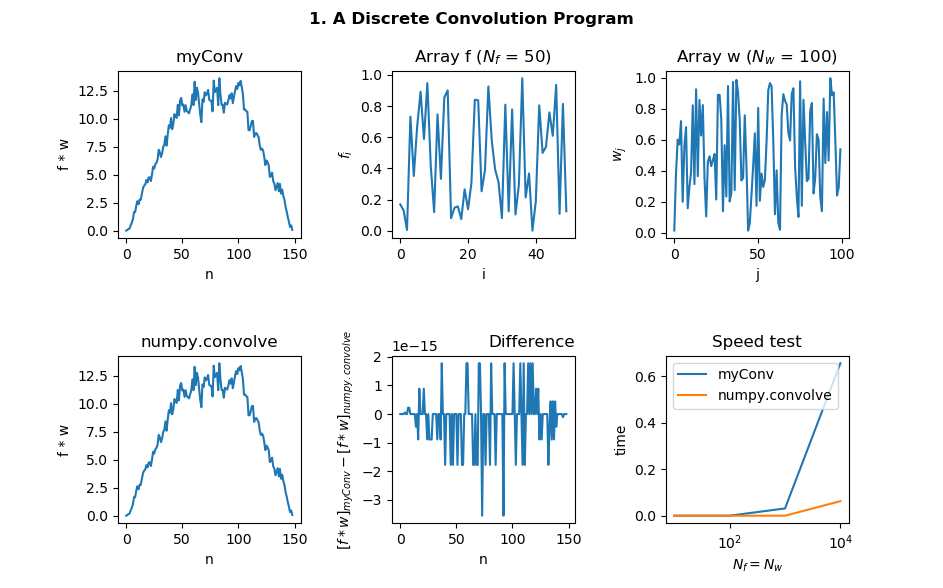

myConv [0.         0.         0.03124809 0.65623093]
numpy.convolve [0.         0.         0.         0.06249928]


In [2]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import time #for speed test

def myConv(f,w): #takes two arrays f and w, and returns their convolution
    delta = 1 #sampling interval
    fa = np.asarray(f) #converts f and w into numpy arrays
    wa = np.asarray(w)
    nf = len(fa) #length of farray, its Nf points
    nw = len(wa) #length of warray, its Nw points
    ng = nf + nw - 1 #length of convolved time series
    ga = np.zeros(ng) #initialize array to be returned
    
    mn = max(nf,nw) #saves length for the larger array
    fa = np.pad(fa,(0,mn-nf), mode='constant') #fills with zeros to be the same size as warray
    aw = np.pad(wa[::-1],(mn,), mode='constant') #flips array and fills with zeroes before and after the array
    
    #loop for n = 0,1,2,...,Nf+Nw-2
    for n in range(1, ng+1): #begins with 1 to be able to slice array
        ga[n-1] = np.sum((aw[mn+nw-n:-n])*fa) #fills the array to be returned with the sum of the product of farray and arrayw displaced
    return ga*delta

#test against numpy.convolve, using U[0,1] to generate points
f = np.random.uniform(0,1,50) #Nf = 50
w = np.random.uniform(0,1,100) #Nw = 100
g = myConv(f,w)
npg = np.convolve(f,w)

#plot config
grid = plt.GridSpec(2, 3, wspace=0.5, hspace=0.7)
plt.subplot(grid[0, 1]) #plot f
plt.plot(np.arange(len(f)),f)
plt.xlabel('i')
plt.ylabel('$f_i$')
plt.title('Array f ($N_f$ = '+str(len(f))+')')
plt.subplot(grid[0, 2]) #plot w
plt.plot(np.arange(len(w)),w)
plt.xlabel('j')
plt.ylabel('$w_j$')
plt.title('Array w ($N_w$ = '+str(len(w))+')')
plt.subplot(grid[0, 0]) #plot myConv's output
plt.plot(np.arange(len(g)),g)
plt.xlabel('n')
plt.ylabel('f * w')
plt.title('myConv')
plt.subplot(grid[1, 0]) #plot numpy.convolve's output
plt.plot(np.arange(len(npg)),npg)
plt.xlabel('n')
plt.ylabel('f * w')
plt.title('numpy.convolve')
plt.subplot(grid[1, 1]) #plot difference between outputs
plt.plot(np.arange(len(g)),g-npg)
plt.xlabel('n')
plt.ylabel('${[f * w]}_{myConv} - {[f * w]}_{numpy.convolve}$')
plt.title('Difference',loc='right')

#speed test
sz= 4 #largest number of points, 10**sz
gt = np.zeros(sz) #initialize arrays to be plotted
npgt = np.zeros(sz)
for n in np.logspace(1,sz,sz): #loop for different amounts of points Nf = Nw; x10 each time
    f = np.random.uniform(0,1,int(n))
    w = np.random.uniform(0,1,int(n))
    t1 = time.time()
    g = myConv(f,w)
    t2 = time.time()
    gt[int(np.log10(n/10))] = t2 - t1 #array with times from myConv
    t1 = time.time()
    npg = np.convolve(f,w)
    t2 = time.time()
    npgt[int(np.log10(n/10))] = t2 - t1 #array with times from numpy.convolve

#speed test plot config
plt.subplot(grid[1, 2])
plt.semilogx(np.logspace(1,sz,sz),gt,label="myConv")
plt.semilogx(np.logspace(1,sz,sz),npgt,label="numpy.convolve")
plt.legend(loc='upper left')
plt.xlabel('$N_f = N_w$')
plt.ylabel('time')
plt.title('Speed test')
plt.suptitle('1. A Discrete Convolution Program',fontweight='bold')

#print test results by console
print("myConv",gt)
print("numpy.convolve",npgt)

#show plots
plt.show()

# 2 Simple Physical System: RL Circuit Response (8 pts)

Consider a simple physical system consisting of a resistor (with resistance `R`) and an inductor (with
inductance `L`) in series. We apply an input voltage $a(t)$ across the pair in series, and measure the output
voltage $b(t)$ across the inductor alone. For this linear system,

 1. Show analytically that its step response (i.e., the $b(t)$ we obtain when the input voltage $a(t) = H(t)$,
    the Heaviside function) is given by

    $$ S(t) = e^{-Rt/L} H(t), $$

    and its impulse response (i.e., the output voltage $b(t)$ when $a(t) = \delta(t)$) is given by

    $$ R(t) = \delta(t) - \frac{R}{L} e^{-Rt/L} H(t). $$

    _Hint_: Construct and solve the ODE relating the voltages under consideration. Consider the two $b(t)$ choices to derive $S(t)$ and $R(t)$. Formulas $\frac{d}{dt} H(t) = \delta(t)$ and $\delta(t) f(t) = \delta(t) f(0)$ may help.
 2. Discretize the impulse response $R(t)$ function, realizing that $H(t)$ should be discretized as

    $$H = [0.5, 1, 1, \dots],$$

    and $\delta(t)$ should be discretized as

    $$D = [1/dt, 0, 0, \dots].$$

    Take advantage of your `myConv` function, or the NumPy built-in function `convolve`, and write
    your own Python function `V_out = RLresponse(R,L,V_in,dt)` to take an input series $V_{in}$ sampled
    at $\Delta = dt$, and calculate the output series $V_{out}$ sampled by the same $dt$. Please paste your
    Python function here. (Hint: here $\Delta$ may not be 1, so remember to build the multiplication of
    $\Delta$ into your convolution function.)
 3. Using $R = 850 \Omega$, $L = 2 H$, and sampling period $dt = 0.20 \text{ ms}$, test your RL-response
    function with {$H_n$} series (discretized $H(t)$) as input, and plot the output time series (as circles) on
    top of the theoretical curve $S(t)$ given by part 1 (as a solid line). Repeat this for {$D_n$} (discretized
    $\delta(t)$) and $R(t)$. Make the time range of the plots 0 to at least 20 ms. Please list your Python
    code here.

# EXPLANATIONS FOR THE SECOND PROBLEM

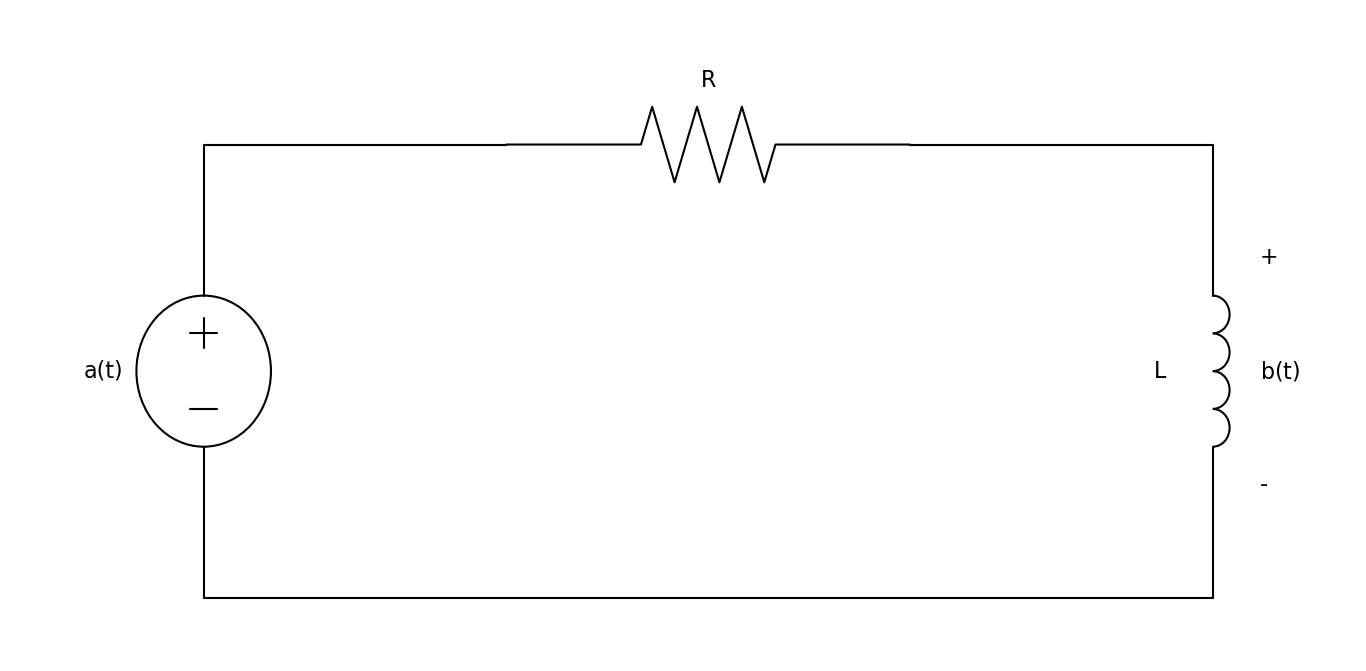

1.
- Using Kirchhoff's voltage law, we can say:

$$a(t) = v_R (t) + v_L (t)$$

- According to Ohm's law: $v_R (t) = R \cdot i(t)$

- According to the definition of inductance: $v_L (t) = L \cdot \frac{d}{dt} i(t)$

Then,

$$a(t) = v_R (t) + v_L (t) = R \cdot i(t) + L \cdot \frac{d}{dt} i(t)$$

Thus,

$$\frac{a(t)}{L} = \frac{R}{L} \cdot i(t) + \frac{d}{dt} i(t)$$

This is a linear non-homogeneous ordinary differential equation.
\
\
Also, for our case: $b(t) = v_L (t)$
\
\
\
\
To solve these ODEs it is helpful to remember that their solution consist on two components: an homogeneous solution and a particular solution:

$$ i(t) = i_h (t) + i_p (t) $$

The homogeneous solution comes from rewriting the original ODE as a linear homogeneous ODE:

$$ 0 = \frac{R}{L} \cdot i_h(t) + \frac{d}{dt} i_h(t) $$

This has a solution of the form $ i_h(t) = C_1 \cdot e^{-\frac{R}{L} t} $

Where $C_1$ depends on the initial conditions.
\
\
\
\
Now, the particular solution will depend on $a(t)$. For our particular case, it will be either the Heaviside function, or the Dirac delta function depending on the type of respose we want from the system. The former gives us the $step$ response $S(t)$, while the latter gives us the $impulse$ response $R(t)$.

When we say:

$$ a(t) = H(t) $$

We're essentialy saying $ a(t) = 1 $ for all positive values of $t$

Then, our ODE becomes:

$$\frac{1}{L} = \frac{R}{L} \cdot i(t) + \frac{d}{dt} i(t)$$

We need to find the particular solution, so $ i(t) = i_h (t) + i_p (t) $

$$\frac{1}{L} = \frac{R}{L} \cdot \left[i_h (t) + i_p (t)\right] + \frac{d}{dt} \left[i_h (t) + i_p (t)\right]$$

Plugging in our homogeneous solution:

$$\frac{1}{L} = \left(\frac{R}{L}\right) \cdot \left[C_1 e^{-\frac{R}{L} t} + i_p (t) \right] + \frac{d}{dt} \left[C_1 e^{-\frac{R}{L} t} + i_p (t) \right]$$

$$\frac{1}{L} = \left(\frac{R}{L} \cdot C_1 e^{-\frac{R}{L} t}\right) + \left[\left(\frac{R}{L}\right) i_p (t) \right] + \left[C_1 \left(-\frac{R}{L}\right) e^{-\frac{R}{L} t}\right] + \left[\frac{d}{dt}i_p (t) \right]$$

$$\frac{1}{L} = \left(\frac{R}{L}\right) i_p (t) + \frac{d}{dt}i_p (t) $$

Here we can see that $ i_p (t) = \frac{1}{R} $ satisfies this equation:

$$\frac{1}{L} = \left(\frac{R}{L}\right) \left(\frac{1}{R}\right) + \frac{d}{dt}\left(\frac{1}{R}\right) ⇒ \frac{1}{L} = \frac{1}{L} + 0 $$

So, by adding together both $ i_h (t) $ and $ i_p (t) $ we reach the solution:

$$ i(t) = \frac{1}{R} + C_1 \cdot e^{-\frac{R}{L} t}$$

If we say $i(0) = 0 $ A :

$$ 0 = \frac{1}{R} + C_1 \cdot e^{-\frac{R}{L} (0)} ⇒ 0 = \frac{1}{R} + C_1 \cdot (1) ⇒ C_1 = - \frac{1}{R}$$

Then,

$$ i(t) = \frac{1}{R} - \frac{1}{R} \cdot e^{-\frac{R}{L} t} $$

And so, for $ b(t) = v_L (t) = L \cdot \frac{d}{dt} i(t) $

$$ b(t) = L \cdot \frac{d}{dt} \left[\frac{1}{R} - \frac{1}{R} \cdot e^{-\frac{R}{L} t}\right] $$

$$ b(t) = L \cdot [(0) - \left(\frac{1}{R}\right) \cdot \left(-\frac{R}{L}\right) \cdot e^{-\frac{R}{L} t}] $$

$$ b(t) = e^{-\frac{R}{L} t} $$

Or, $ b(t) = e^{-\frac{R}{L} t} H(t) $ for all positive values of $t$

We can verify that for negative values of $t$, the solution is the same. In this case $ a(t) = 0 $; and so the homogeneous solution becomes the only solution:

$$ i(t) = C \cdot e^{-\frac{R}{L} t} $$

If we say $i(0) = 0 $ A :

$$ 0 = C \cdot e^{-\frac{R}{L} (0)} ⇒ 0 = C \cdot (1) ⇒ C = 0 $$

Then, $ i(t) = 0 $ for all negative values of $t$

And, in turn, $ b(t) = 0 $ for all negative values of $t$

Or,

$ b(t) = e^{-\frac{R}{L} t} H(t) $ for all negative values of $t$ as well as all the positives.

----------------------------------------------------------------------------------------------------------------------------
For the $impulse$ response, thankfully we have the same homogeneous solution:

$ i_h(t) = C_1 \cdot e^{-\frac{R}{L} t} $

We need the particular solution for $a(t) = \delta(t)$

$$\frac{\delta(t)}{L} = \frac{R}{L} \cdot \left[i_h (t) + i_p (t)\right] + \frac{d}{dt} \left[i_h (t) + i_p (t)\right]$$

Once again, plugging in our homogeneous solution:

$$\frac{\delta(t)}{L} = \left(\frac{R}{L}\right) \cdot \left[C_1 e^{-\frac{R}{L} t} + i_p (t) \right] + \frac{d}{dt} \left[C_1 e^{-\frac{R}{L} t} + i_p (t) \right]$$

$$\frac{\delta(t)}{L} = \left(\frac{R}{L}\right) i_p (t) + \frac{d}{dt}i_p (t) $$

This one is a nit more difficult, but using the hints we can find that a solution of the form $ i_p(t) = \frac{H(t)}{L} \cdot e^{-\frac{R}{L} t} $ satisfies the equation. Let's see:

$$\frac{\delta(t)}{L} = \left(\frac{R}{L}\right) \left(\frac{H(t)}{L} \cdot e^{-\frac{R}{L} t}\right) + \frac{d}{dt}\left(\frac{H(t)}{L} \cdot e^{-\frac{R}{L} t}\right) $$

$$\frac{\delta(t)}{L} = \left(\frac{R}{L}\right) \left(\frac{H(t)}{L} \cdot e^{-\frac{R}{L} t}\right) + \frac{d}{dt}\left(\frac{H(t)}{L}\right) \cdot e^{-\frac{R}{L} t} + \frac{H(t)}{L} \cdot \frac{d}{dt}\left(e^{-\frac{R}{L} t}\right)$$

Remembering that $\frac{d}{dt} H(t) = \delta(t)$

$$\frac{\delta(t)}{L} = \left(\frac{R}{L}\right) \left(\frac{H(t)}{L} \cdot e^{-\frac{R}{L} t}\right) + \left(\frac{\delta(t)}{L}\right) \cdot e^{-\frac{R}{L} t} - \frac{R}{L} \cdot \left(\frac{H(t)}{L} \cdot e^{-\frac{R}{L} t}\right)$$

$$\frac{\delta(t)}{L} = \left(\frac{\delta(t)}{L}\right) \cdot e^{-\frac{R}{L} t}$$

Also, that  $\delta(t) f(t) = \delta(t) f(0)$

$$\left(\frac{\delta(t)}{L}\right) \cdot e^{-\frac{R}{L} t} = \left(\frac{\delta(t)}{L}\right) \cdot e^{-\frac{R}{L} (0)}$$

So,

$$\frac{\delta(t)}{L} = \left(\frac{\delta(t)}{L}\right) \cdot e^{-\frac{R}{L} (0)}$$

$$\frac{\delta(t)}{L} = \left(\frac{\delta(t)}{L}\right) \cdot (1)$$

$$\frac{\delta(t)}{L} = \frac{\delta(t)}{L}$$

And so, we can say

$$ i(t) = C_1 \cdot e^{-\frac{R}{L} t} + \frac{H(t)}{L} \cdot e^{-\frac{R}{L} t} $$

If we say $i(0) = 0 $ A :

$$ 0 = C_1 \cdot e^{-\frac{R}{L} (0)} + \frac{H(0)}{L} \cdot e^{-\frac{R}{L} (0)} $$

$$ 0 = C_1 \cdot (1) + (0) \cdot e^{-\frac{R}{L} (0)} $$

$$ C_1 = 0 $$

Therefore,

$$ i(t) = \frac{H(t)}{L} \cdot e^{-\frac{R}{L} t} $$

And for $ b(t) = v_L (t) = L \cdot \frac{d}{dt} i(t) $

$$ b(t) = L \cdot \frac{d}{dt} \left[\frac{H(t)}{L} \cdot e^{-\frac{R}{L} t}\right] $$

$$ b(t) = L \cdot \frac{d}{dt} \left[\frac{H(t)}{L}\right] e^{-\frac{R}{L} t} + L \cdot \left(\frac{H(t)}{L}\right) \cdot \frac{d}{dt} \left(e^{-\frac{R}{L} t}\right)$$

$$ b(t) = L \cdot \left[\frac{\delta(t)}{L}\right] e^{-\frac{R}{L} t} + L \cdot \left(-\frac{R}{L}\right) \cdot \frac{H(t)}{L} \left(e^{-\frac{R}{L} t}\right)$$

$$ b(t) = \delta(t) e^{-\frac{R}{L} t} + \left(-\frac{R \cdot H(t)}{L}\right) \left(e^{-\frac{R}{L} t}\right)$$

Once again, $\delta(t) f(t) = \delta(t) f(0)$

$$ \delta(t) e^{-\frac{R}{L} t} = \delta(t) e^{-\frac{R}{L} (0)} $$

$$ \delta(t) e^{-\frac{R}{L} t} = \delta(t) (1) $$

$$ \delta(t) e^{-\frac{R}{L} t} = \delta(t) $$

Finally,

$$ b(t) = \delta(t) - \frac{R}{L} e^{-\frac{R}{L} t} \cdot H(t) $$

----------------------------------------------------------------------------------------------------------------------------

2. It can be found on the code cell, next below.
3. It can be found on the code cell, next below.


<IPython.core.display.Javascript object>


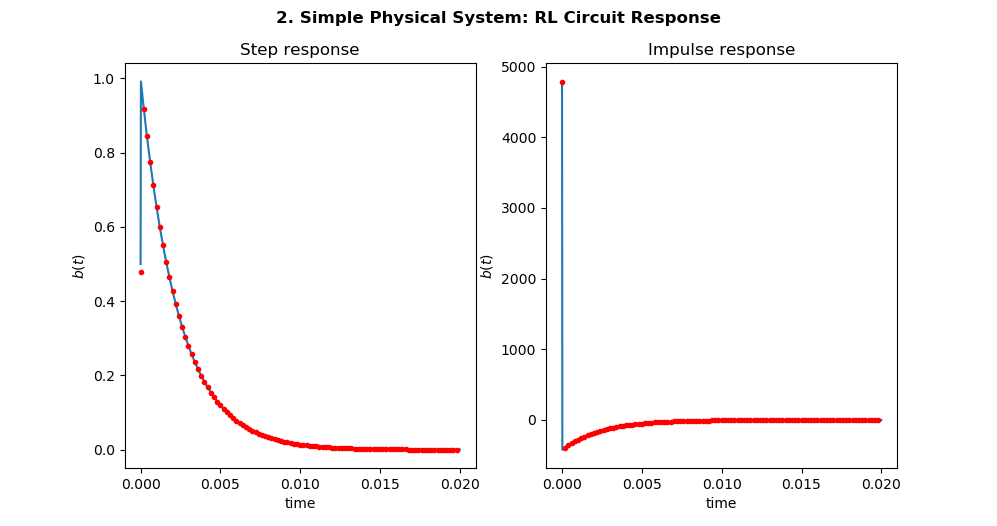

In [3]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt

def myConv(f,w,d): #takes two arrays f and w, and returns their convolution for a given sampling interval d
    delta = d #sampling interval
    fa = np.asarray(f) #converts f and w into numpy arrays
    wa = np.asarray(w)
    nf = len(fa) #length of farray, its Nf points
    nw = len(wa) #length of warray, its Nw points
    ng = nf + nw - 1 #length of convolved time series
    ga = np.zeros(ng) #initialize array to be returned
    
    mn = max(nf,nw) #saves length for the larger array
    fa = np.pad(fa,(0,mn-nf), mode='constant') #fills with zeros to be the same size as warray
    aw = np.pad(wa[::-1],(mn,), mode='constant') #flips array and fills with zeroes before and after the array
    
    #loop for n = 0,1,2,...,Nf+Nw-2
    for n in range(1, ng+1): #begins with 1 to be able to alice array
        ga[n-1] = np.sum((aw[mn+nw-n:-n])*fa) #fills the array to be returned with the sum of the product of farray and arrayw displaced
    return ga*delta

def RLresponse(R,L,V_in,dt):
    H = np.ones(len(V_in)) #discrete H
    H[0] = 0.5
    D = np.zeros(len(V_in)) #discrete D
    D[0] = 1/dt
    t = np.arange(0,dt*len(V_in),dt) #discrete time array, starting at 0
    resp = D - (R/L)*np.exp((-R/L)*t)*H #discrete system
    return myConv(resp,V_in,dt)[0:len(V_in)] #discrete response array sliced to be the same size as V_in

#Defining values for R,L,start,stop and dt from the original statement
R = 850
L = 2
start = 0
stop = 20/1000
dt = 0.2/1000
tm = np.arange(start,stop,dt) #discrete time array
H = np.ones(len(tm)) #discrete H
H[0] = 0.5
D = np.zeros(len(tm)) #discrete D
D[0] = 1/dt
V_out_S = RLresponse(R,L,H,dt) #b(t) as a step response
V_out_R = RLresponse(R,L,D,dt) #b(t) as an impulse response

contn = 1000 #continuous plot points
conttm = np.linspace(start,stop,contn)
contH = np.ones(contn) #continuous H
contH[0] = 0.5
contD = np.zeros(contn) #continuous D
contD[0] = 1/dt
S = np.exp((-R/L)*conttm) * contH #continuous S
R = contD - (R/L)*np.exp((-R/L)*conttm)*contH #continuous R

#plot config
plt.subplot(121) #plot S
plt.plot(conttm, S)
plt.plot(tm,V_out_S,'.r')
plt.xlabel('time')
plt.ylabel('$b(t)$')
plt.title('Step response')
plt.subplot(122) #plot R
plt.plot(conttm, R)
plt.plot(tm,V_out_R,'.r')
plt.xlabel('time')
plt.ylabel('$b(t)$')
plt.title('Impulse response')
plt.suptitle('2. Simple Physical System: RL Circuit Response',fontweight='bold')
plt.show()

# 3 Convolution of Synthetic Seismograms (5 pts)

Numerical simulations of seismic wave propagation can now be routinely done for [global and regional
earthquakes](http://global.shakemovie.princeton.edu/). For a recent southern Pakistan earthquake (Jan 18,
2011, 20:23:33 UTC), raw vertical synthetic seismogram (i.e., displacement field simulated at a seismic
station) for station `RAYN` (Ar Rayn, Saudi Arabia) is provided (`RAYN.II.LHZ.sem`). A common practice in
seismology is to convolve synthetic seismograms with a Gaussian function

$$ g(t) = \frac{1}{\sqrt{\pi}t_H} e^{-(t/t_H)^2} $$

to reflect either the time duration of the event or the accuracy of the numerical simulation.

 1. Provide two plots. Plot 1: the raw synthetic seismogram for station `RAYN` between 0 and 800 seconds. Plot 2: Gaussian
    functions with half duration $t_H = 10 \text{ sec}$ and $t_H = 20 \text{ sec}$ (include a legend). For the gaussians, use the same timestep $dt$ as the seismogram data.
 2. Use numpy's convolve function to convolve the raw timeseries with a Gaussian function (both $t_H = 10$ and $t_H = 20$ cases). Plot the raw data and the two convolved time series between 0 and 800 seconds on the same graph (include a legend) and comment on your results.

__Hints__

* The raw synthetics `RAYN.II.LHZ.sem` is given as a text file with two columns: time in seconds and
displacement in meters.
* Gaussian functions quickly decay to zero beyond $[-3t_H, 3t_H ]$, therefore it is sufficient to sample $g(t)$
within this interval.
* Use `mode='same'` when calling numpy convolve to truncate the convolution to the max of the supplied arrays (i.e. length of the raw timeseries in our case). This is convenient, since we want to compare the convolution output to the original timeseries. Alternatively, use the default mode (`'full'`) and truncate the output manually. 
* As a check for part 2, ensure that your convolved timeseries is aligned with (or "overlaps") the raw data timeseries.

# EXPLANATIONS FOR THE THIRD PROBLEM

1. They can be found on the code cell, next below.
2. It can be found on the code cell, next below. It can be noted that the convolved plots better show the overall behavior of the seismographic data. This makes sense given that the gaussian functions are closer to zero farther from the origin.

<IPython.core.display.Javascript object>


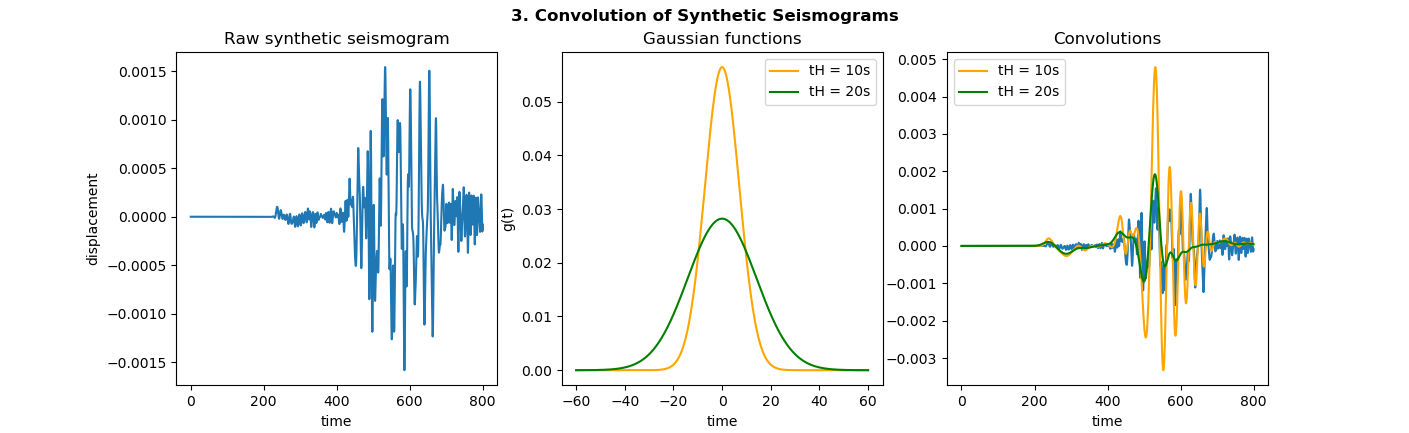

In [4]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt

def gaussianf(t,th): #define gaussian function using the formula from the original statement
    return ( 1 / ( np.sqrt(np.pi) * th ) )*np.exp(-(t/th)**2)

f1 = open("RAYN.II.LHZ.sem","r") #open raw seismogram
t = np.zeros(len(f1.readlines())) #initialize time array
d = np.zeros(len(t)) #initialize displacement array
aux = np.zeros(2) #auxiliary array to split time and displacement from the same reading
start = 0 #initialize index for when t > 0s
flag1 = 0
stop = 0 #initialize index for when t > 800s
flag2 = 0
f1.seek(0,0) #back to the start of the file
for i in range(len(t)): #read lines from the file, and put each column to the corresponding array
    aux = f1.readline().split()
    t[i] = aux[0]
    d[i] = aux[1]
    if t[i] > 0 and flag1 == 0:
        start = i
        flag1 = 1
    if t[i] > 800 and flag2 == 0:
        stop = i-1
        flag2 = 1
f1.close()

dt = t[1]-t[0] #sampling interval
tg = np.arange(-3*20,3*20,dt) #time array for gaussian functions. It takes the max tH
g1 = gaussianf(tg,10) #gaussian function for tH = 10s
g2 = gaussianf(tg,20) #gaussian function for tH = 20s

c1 = np.convolve(d,g1,mode='same') #convolution with g1
c2 = np.convolve(d,g2,mode='same') #convolution with g2

#plot config
plt.subplot(131) #plot 1
plt.plot(t[start:stop],d[start:stop])
plt.xlabel('time')
plt.ylabel('displacement')
plt.title('Raw synthetic seismogram')
plt.subplot(132) #plot 2
plt.plot(tg,g1,color='orange',label='tH = 10s')
plt.plot(tg,g2,color='green',label='tH = 20s')
plt.legend()
plt.xlabel('time')
plt.ylabel('g(t)')
plt.title('Gaussian functions')
plt.subplot(133) #plot 3
plt.plot(t[start:stop],d[start:stop])
plt.plot(t[start:stop],c1[start:stop],color='orange',label='tH = 10s')
plt.plot(t[start:stop],c2[start:stop],color='green',label='tH = 20s')
plt.legend()
plt.xlabel('time')
plt.title('Convolutions')
plt.suptitle('3. Convolution of Synthetic Seismograms',fontweight='bold')
plt.show()